# Building Machine Learning Model for Predicting if the customer will do fraud in insurance claim or not!

In this notebook we are going to apply Python based Machine Learning algorithms/model of predicting if the customer taking claim is doing fraud or not.

Step by step road map:

#Step 1:  Defining the problem statement
> Based on all the given attributes can we predict if the customer claim is fraud or not.

#Step 2: Data 
> We have downloaded the data from kaggle. 
Source : https://www.kaggle.com/roshansharma/insurance-claim


#Step 3: Evaluation
> Our bentch mark for this model is to achieve atleast 80% accuracy to pursue the project further

#Step 4: Features

* months_as_customer
* age
* policy_number
* policy_bind_date
* policy_state
* policy_csl
* policy_deductable
* policy_annual_premium
* umbrella_limit
* insured_zip
* insured_sex
* insured_education_level
* insured_occupation
* insured_hobbies
* insured_relationship
* capital-gains
* capital-loss
* incident_date
* incident_type
* collision_type
* incident_severity
* authorities_contacted
* incident_state
* incident_city
* incident_location
* incident_hour_of_the_day
* number_of_vehicles_involved
* property_damage
* bodily_injuries
* witnesses
* police_report_available
* total_claim_amount
* injury_claim
* property_claim
* vehicle_claim
* auto_make
* auto_model
* auto_year
* fraud_reported -- "TARGET VARIABLE"

#Step 5: Data Modelling
#Step 6: Experimentation


# Let's get our tools ready!

In [3]:
#Importing all the tools we are going to use

#Libraries for Exploratory Data Analysis(EDA) & Plotting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Helps in plotting plots inside the notebook
%matplotlib inline

#Model building using Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Tools for Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

# Loading Data into Notebook

In [5]:
data = pd.read_csv("insurance_claims.csv")
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [7]:
#Checking the shape of the dataset
data.shape

(1000, 39)

# Exploratory Data Analysis(EDA)



In [8]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [9]:
data.tail()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N
999,456,60,556080,11-11-1996,OH,250/500,1000,766.19,0,612260,...,3,?,5060,460,920,3680,Mercedes,E400,2007,N


# As we are working on the problem to find if the customer did fraud or not
* So our target variable will be fraud_reported

In [10]:
#How many types of classified classes in the target variable
data.fraud_reported.value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

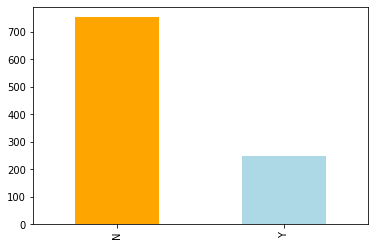

In [14]:
data["fraud_reported"].value_counts().plot(kind = "bar",
                                           color = ["orange", "lightblue"]);

In [16]:
#Detailed information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [18]:
#Checking the null values
data.isna().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [19]:
#Summary of dataset
data.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [20]:
#Claim based on sex of customer to find any correlation
data.insured_sex.value_counts()

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

In [21]:
#Comapare fraud report with insurer sex
pd.crosstab(data.fraud_reported, data.insured_sex)

insured_sex,FEMALE,MALE
fraud_reported,,
N,411,342
Y,126,121


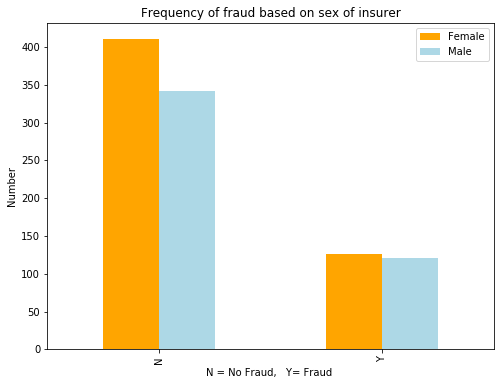

In [25]:
#Plot of cross tab
pd.crosstab(data.fraud_reported, data.insured_sex).plot(kind = "bar",
                                                       figsize=(8,6),
                                                       color= ["orange","lightblue"])
plt.title("Frequency of fraud based on sex of insurer")
plt.xlabel("N = No Fraud,   Y= Fraud ")
plt.ylabel("Number")
plt.legend(["Female", "Male"]);

#Claim based on witnesses of customer to find any correlation

In [26]:
#Claim based on witnesses of customer to find any correlation
data.witnesses.value_counts()

1    258
2    250
0    249
3    243
Name: witnesses, dtype: int64

In [27]:
#Comparing the witnesses column with fraud reported
pd.crosstab(data.fraud_reported, data.witnesses)

witnesses,0,1,2,3
fraud_reported,,,,
N,199,195,176,183
Y,50,63,74,60


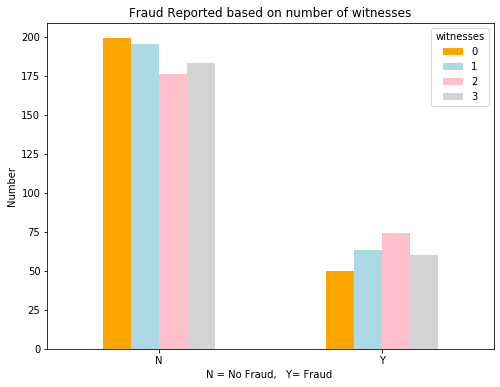

In [42]:
#create a plot of cross tab
pd.crosstab(data.fraud_reported, data.witnesses).plot(kind = "bar",
                                                     figsize=(8,6),
                                                     color=["orange","lightblue","pink","lightgrey" ])

plt.title("Fraud Reported based on number of witnesses")
plt.xlabel("N = No Fraud,   Y= Fraud ")
plt.ylabel("Number")
plt.xticks(rotation = 0);

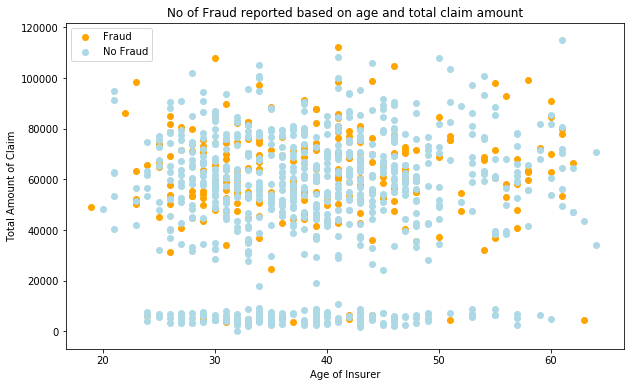

In [36]:
#Creating figure
plt.figure(figsize = (10,6))

#Creating scatter plot for True fraud report based on age of insurer
plt.scatter(data.age[data.fraud_reported== "Y"],
           data.total_claim_amount[data.fraud_reported=="Y"],
           c="orange")

plt.scatter(data.age[data.fraud_reported=="N"],
           data.total_claim_amount[data.fraud_reported=="N"],
           c="lightblue");

#Labelling of the graph
plt.title("No of Fraud reported based on age and total claim amount")
plt.xlabel("Age of Insurer")
plt.ylabel("Total Amount of Claim")
plt.legend(["Fraud", "No Fraud"]);

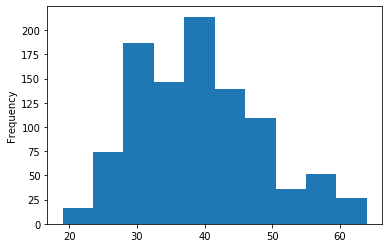

In [37]:
#Histogram of age to get distribution of fraud report
data.age.plot.hist();

# Constructing Correlation Matrix 

In [43]:
data.corr()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
months_as_customer,1.000000,0.922098,0.057555,0.026807,0.005018,0.015498,0.017895,0.006399,0.020209,0.070639,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,-0.000292
age,0.922098,1.000000,0.059413,0.029188,0.014404,0.018126,0.025604,-0.007075,0.007368,0.087161,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,0.001354
policy_number,0.057555,0.059413,1.000000,-0.006738,0.022566,0.008968,0.007083,0.009802,-0.005669,0.000113,0.013432,-0.004558,-0.012661,-0.018009,-0.008762,-0.010678,-0.020184,-0.000183
policy_deductable,0.026807,0.029188,-0.006738,1.000000,-0.003245,0.010870,0.004545,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,0.026105
policy_annual_premium,0.005018,0.014404,0.022566,-0.003245,1.000000,-0.006247,0.032354,-0.013738,0.023547,-0.001578,-0.045991,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246,-0.049226
umbrella_limit,0.015498,0.018126,0.008968,0.010870,-0.006247,1.000000,0.019671,-0.047268,-0.024056,-0.023257,-0.021270,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584,0.009893
insured_zip,0.017895,0.025604,0.007083,0.004545,0.032354,0.019671,1.000000,0.006303,0.049372,0.008274,0.027448,0.028695,0.019805,-0.033873,-0.017495,-0.006841,-0.041083,-0.032736
capital-gains,0.006399,-0.007075,0.009802,0.035212,-0.013738,-0.047268,0.006303,1.000000,-0.046904,-0.016406,0.061643,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836,0.031398
capital-loss,0.020209,0.007368,-0.005669,-0.023544,0.023547,-0.024056,0.049372,-0.046904,1.000000,-0.025054,-0.014895,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665,-0.056615
incident_hour_of_the_day,0.070639,0.087161,0.000113,0.060935,-0.001578,-0.023257,0.008274,-0.016406,-0.025054,1.000000,0.120794,-0.034563,0.006527,0.217702,0.165768,0.179536,0.215626,0.021368


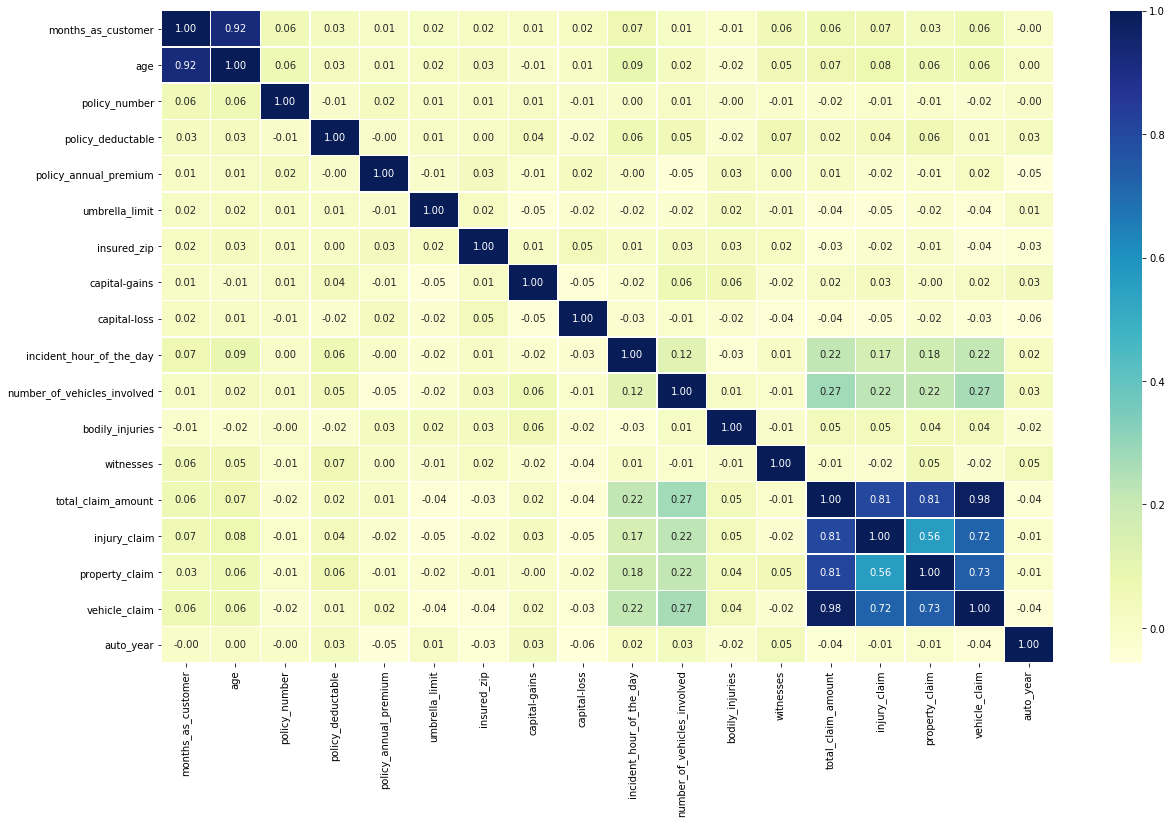

In [48]:
#Graphical Represenation of correlation matrix
corr_matrix= data.corr()

fig, ax = plt.subplots(figsize = (20,12))

ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidth = 0.5,
              fmt= ".2f",
              cmap = "YlGnBu")
bottom, top=ax.get_ylim()
ax.set_ylim(bottom+0.5, top - 0.5);

In [145]:
#Copy of original dataset
data_tmp = data.copy()

In [146]:
#Converting all the string value into category values
for label, content in data_tmp.items():
    if pd.api.types.is_string_dtype(content):
        data_tmp[label] = content.astype("category").cat.as_ordered()

In [147]:
#Changing strings into categorical data
data_tmp.fraud_reported.cat.codes

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Length: 1000, dtype: int8

In [148]:
data_tmp.isna().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [149]:
#find the columns which contains strings
for label, content in data_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

policy_bind_date
policy_state
policy_csl
insured_sex
insured_education_level
insured_occupation
insured_hobbies
insured_relationship
incident_date
incident_type
collision_type
incident_severity
authorities_contacted
incident_state
incident_city
incident_location
property_damage
police_report_available
auto_make
auto_model
fraud_reported


In [150]:
#Converting all the string columns into category values
for label, content in data_tmp.items():
    if pd.api.types.is_string_dtype(content):
        data_tmp[label]= content.astype("category").cat.as_ordered()

In [151]:
data_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   months_as_customer           1000 non-null   int64   
 1   age                          1000 non-null   int64   
 2   policy_number                1000 non-null   int64   
 3   policy_bind_date             1000 non-null   category
 4   policy_state                 1000 non-null   category
 5   policy_csl                   1000 non-null   category
 6   policy_deductable            1000 non-null   int64   
 7   policy_annual_premium        1000 non-null   float64 
 8   umbrella_limit               1000 non-null   int64   
 9   insured_zip                  1000 non-null   int64   
 10  insured_sex                  1000 non-null   category
 11  insured_education_level      1000 non-null   category
 12  insured_occupation           1000 non-null   category
 13  insu

In [152]:
data_tmp.fraud_reported.cat.categories

Index(['N', 'Y'], dtype='object')

In [153]:
#Changing string of fraud reported to categories
data_tmp.fraud_reported.cat.codes

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Length: 1000, dtype: int8

In [141]:
#Save prepocessed data
#data_tmp.to_csv("train_tmp_ic.csv",
               index = False)

In [142]:
#data_tmp = pd.read_csv("train_tmp_ic.csv")

In [154]:
data_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   months_as_customer           1000 non-null   int64   
 1   age                          1000 non-null   int64   
 2   policy_number                1000 non-null   int64   
 3   policy_bind_date             1000 non-null   category
 4   policy_state                 1000 non-null   category
 5   policy_csl                   1000 non-null   category
 6   policy_deductable            1000 non-null   int64   
 7   policy_annual_premium        1000 non-null   float64 
 8   umbrella_limit               1000 non-null   int64   
 9   insured_zip                  1000 non-null   int64   
 10  insured_sex                  1000 non-null   category
 11  insured_education_level      1000 non-null   category
 12  insured_occupation           1000 non-null   category
 13  insu

In [155]:
#Checking missinng values
data_tmp.isnull().sum()/len(data_tmp)

months_as_customer             0.0
age                            0.0
policy_number                  0.0
policy_bind_date               0.0
policy_state                   0.0
policy_csl                     0.0
policy_deductable              0.0
policy_annual_premium          0.0
umbrella_limit                 0.0
insured_zip                    0.0
insured_sex                    0.0
insured_education_level        0.0
insured_occupation             0.0
insured_hobbies                0.0
insured_relationship           0.0
capital-gains                  0.0
capital-loss                   0.0
incident_date                  0.0
incident_type                  0.0
collision_type                 0.0
incident_severity              0.0
authorities_contacted          0.0
incident_state                 0.0
incident_city                  0.0
incident_location              0.0
incident_hour_of_the_day       0.0
number_of_vehicles_involved    0.0
property_damage                0.0
bodily_injuries     

#Turn categorical variable into numbers


In [168]:
#Turn categorical variable into numbers
for label, content in data_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        data_tmp[label] = pd.Categorical(content).codes+1

# 5.Modelling

In [169]:
data_tmp.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,533,3,2,1000,1406.91,0,466132,...,2,3,71610,6510,13020,52080,11,2,2004,2
1,228,42,342868,822,2,2,2000,1197.22,5000000,468176,...,0,1,5070,780,780,3510,9,13,2007,2
2,134,29,687698,187,3,1,2000,1413.14,5000000,430632,...,3,2,34650,7700,3850,23100,5,31,2007,1
3,256,41,227811,767,1,2,2000,1415.74,6000000,608117,...,2,2,63400,6340,6340,50720,4,35,2014,2
4,228,44,367455,182,1,3,1000,1583.91,6000000,610706,...,1,2,6500,1300,650,4550,1,32,2009,1


In [170]:
X = data_tmp.drop("fraud_reported", axis=1)
y=data_tmp["fraud_reported"]

In [171]:
data_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   int16  
 4   policy_state                 1000 non-null   int8   
 5   policy_csl                   1000 non-null   int8   
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   int8   
 11  insured_education_level      1000 non-null   int8   
 12  insured_occupation           1000 non-null   int8   
 13  insured_hobbies    

In [172]:
y.head()

0    2
1    2
2    1
3    2
4    1
Name: fraud_reported, dtype: int8

In [173]:
#Split data intp train and test sets
np.random.seed(42)

#Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size = 0.2)
X_train

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
29,241,45,596785,107,1,3,2000,1104.50,0,432211,...,2,2,2,91650,14100,14100,63450,1,34,2011
535,65,23,876699,390,3,2,1000,1099.95,0,473109,...,1,0,3,52400,6550,6550,39300,1,24,2005
695,289,45,943425,869,3,2,2000,1221.41,0,466289,...,2,1,2,2700,300,300,2100,7,7,2006
557,63,26,550930,382,1,3,500,1500.04,6000000,613826,...,0,2,3,5160,860,860,3440,1,34,2004
836,257,43,797636,587,2,1,1000,974.84,0,468984,...,0,1,3,85320,21330,7110,56880,10,30,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,464,61,632627,222,3,3,1000,1125.37,0,604450,...,0,2,3,79800,6650,19950,53200,11,4,2000
270,369,55,577810,452,3,2,2000,1589.54,0,444734,...,2,0,3,85300,17060,8530,59710,13,19,2003
860,230,42,175960,503,2,1,1000,1023.11,0,476130,...,1,2,3,58850,10700,10700,37450,1,24,1999
435,102,28,810189,902,3,2,500,1075.41,0,445648,...,1,0,2,73400,7340,7340,58720,5,28,1996


In [176]:
# Put models in dictionary to make function
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

#Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    
    """
    Fits and evaluate given machine learnin models.
    models: A dict of different Scikit-larn machine learning models
    X_train: training data
    X_test: testinng data
    y_train: traininng labels
    y_test: test labels
    """
    #set random seed
    np.random.seed(42)
    
    #Make a dictionary to keep model scores
    model_scores = {}
    
    #Loop through models
    for name, model in models.items():
        #Fit the model to the data
        model.fit(X_train, y_train)
        #Evaluate the model and append its score to model_scores
        model_scores[name]=model.score(X_test, y_test)
    return model_scores
    

In [177]:
model_scores = fit_and_score(models=models,
                            X_train = X_train,
                            X_test= X_test,
                            y_train = y_train,
                            y_test = y_test)
model_scores

/Users/ayushjain/Desktop/sample_project/env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'Logistic Regression': 0.725, 'KNN': 0.7, 'Random Forest': 0.74}

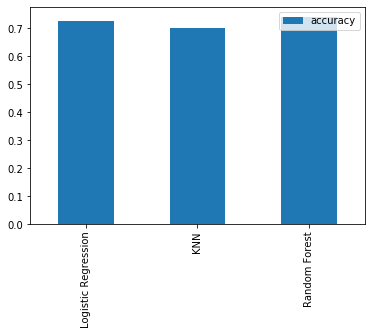

In [179]:
#Model comaprision
model_compare = pd.DataFrame(model_scores, index = ["accuracy"])
model_compare.T.plot.bar();

# Class imbalance

* This case seems to be of class imbalance as target variable is have approximately 72% NO values and  abd 28% Yes values.
* Its seems that the results are totally biased and we need to balance them..lets balancing the dataset to get unbiased results

In [375]:
from sklearn.utils import resample

# Separate majority and minority classes
data_tmp_majority = data_tmp[data_tmp.fraud_reported==2]
data_tmp_minority = data_tmp[data_tmp.fraud_reported==1]
 
# Upsample minority class
data_tmp_minority_upsampled = resample(data_tmp_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=247,    # to match majority class
                                 random_state= 42) # reproducible results
 
# Combine majority class with upsampled minority class
data_tmp_upsampled = pd.concat([data_tmp_majority, data_tmp_minority_upsampled])
 
# Display new class counts
data_tmp_upsampled.fraud_reported.value_counts()

2    247
1    247
Name: fraud_reported, dtype: int64

In [376]:
data_tmp_upsampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 494 entries, 0 to 998
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           494 non-null    int64  
 1   age                          494 non-null    int64  
 2   policy_number                494 non-null    int64  
 3   policy_bind_date             494 non-null    int16  
 4   policy_state                 494 non-null    int8   
 5   policy_csl                   494 non-null    int8   
 6   policy_deductable            494 non-null    int64  
 7   policy_annual_premium        494 non-null    float64
 8   umbrella_limit               494 non-null    int64  
 9   insured_zip                  494 non-null    int64  
 10  insured_sex                  494 non-null    int8   
 11  insured_education_level      494 non-null    int8   
 12  insured_occupation           494 non-null    int8   
 13  insured_hobbies     

In [377]:
X1 = data_tmp_upsampled.drop("fraud_reported", axis=1)
y1= data_tmp_upsampled["fraud_reported"]

In [378]:
#Split data intp train and test sets
np.random.seed(42)

#Split into train and test sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,
                                                   test_size = 0.2)
X1_train

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
551,337,53,498842,111,3,1,500,1205.86,0,444583,...,0,1,2,86400,14400,7200,64800,1,32,2001
213,11,40,743163,272,3,3,2000,1217.69,0,440106,...,1,0,1,53460,9720,9720,34020,5,28,2004
863,91,26,101421,603,1,2,1000,1022.46,0,444896,...,0,2,1,74200,7420,7420,59360,8,37,1996
880,121,34,571462,331,2,3,500,1285.42,0,465440,...,1,1,2,67300,6730,6730,53840,5,31,2000
658,303,43,674485,417,3,3,1000,671.01,7000000,479655,...,2,0,1,60210,6690,6690,46830,10,27,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,140,31,388671,13,3,2,2000,1554.86,6000000,608758,...,1,2,1,6120,680,680,4760,7,11,2002
521,5,26,924318,826,1,2,2000,1137.02,0,468872,...,1,3,1,88110,16020,16020,56070,2,6,2003
694,73,30,654974,313,3,1,500,803.36,0,435371,...,0,0,3,57000,0,11400,45600,2,5,2013
488,294,46,735307,40,1,1,500,1532.80,0,473935,...,0,3,3,65780,11960,11960,41860,9,25,2013


In [379]:
# Put models in dictionary to make function
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

#Create a function to fit and score models
def fit_and_score(models, X1_train, X1_test, y1_train, y1_test):
    
    """
    Fits and evaluate given machine learnin models.
    models: A dict of different Scikit-larn machine learning models
    X_train: training data
    X_test: testinng data
    y_train: traininng labels
    y_test: test labels
    """
    #set random seed
    np.random.seed(42)
    
    #Make a dictionary to keep model scores
    model_scores = {}
    
    #Loop through models
    for name, model in models.items():
        #Fit the model to the data
        model.fit(X1_train, y1_train)
        #Evaluate the model and append its score to model_scores
        model_scores[name]=model.score(X1_test, y1_test)
    return model_scores
    

In [380]:
model_scores = fit_and_score(models=models,
                            X1_train = X1_train,
                            X1_test= X1_test,
                            y1_train = y1_train,
                            y1_test = y1_test)
model_scores

/Users/ayushjain/Desktop/sample_project/env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'Logistic Regression': 0.47474747474747475,
 'KNN': 0.5454545454545454,
 'Random Forest': 0.7676767676767676}

### Now we have got a balanced class baseline model and we know a model's first predictions are not always what we should based our next steps off.

what should we do?

Let's look at foloowings:

* Hyperparameter tuning
* Feature importance
* Confusion Matrix
* Cross- validation
* Precision
* Recall
* F1 score
* Classification report
* ROC Curve
* Area under the curve(AUC)
* HyperParameter Tuning


# Hyper Parameter Tuning with RandomizedSearchCV
We are going to tune:

* RandomForestClassifier() using RandomizedSearchCV

In [381]:
#Create a hyperparameter grid for Random Forest Classifier
rf_grid = {"n_estimators": np.arange(10,100,1000),
          "max_depth": [None, 3, 5,10],
          "min_samples_split": np.arange(2,20,2),
          "min_samples_leaf": np.arange(1,20,2)}


In [382]:
%%time
#Tuning Random Forest Classifier
np.random.seed(42)

#Setup randomizedsearchcv for Random forest classifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions = rf_grid,
                          cv=100,
                          n_iter = 20,
                          verbose= True)

#fit randomizedsearchcv for random forest classifier
rs_rf.fit(X1_train, y1_train)

Fitting 100 folds for each of 20 candidates, totalling 2000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


CPU times: user 29.2 s, sys: 162 ms, total: 29.4 s
Wall time: 29.4 s


[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:   29.4s finished


RandomizedSearchCV(cv=100, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
             

In [383]:
rs_rf.best_params_

{'n_estimators': 10,
 'min_samples_split': 8,
 'min_samples_leaf': 7,
 'max_depth': 10}

In [384]:
rs_rf.score(X1_test,y1_test)

0.7777777777777778

In [385]:
model_scores

{'Logistic Regression': 0.47474747474747475,
 'KNN': 0.5454545454545454,
 'Random Forest': 0.7676767676767676}

### Yeeeah we were able to increase the accuracy by 1%

* Lets try GridSearchCV hyper parameter tuning

In [386]:
%%time
#Setting_up Grid hyper parameter search
gs_rf_grid = GridSearchCV(RandomForestClassifier(),
                         param_grid = rf_grid,
                         cv = 100,
                         verbose  =True)

#Fit grid searchcv hyper parameter to the model
gs_rf_grid.fit(X1_train, y1_train)

Fitting 100 folds for each of 360 candidates, totalling 36000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


CPU times: user 8min 59s, sys: 3.18 s, total: 9min 2s
Wall time: 9min 3s


[Parallel(n_jobs=1)]: Done 36000 out of 36000 | elapsed:  9.1min finished


GridSearchCV(cv=100, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ran

In [387]:
gs_rf_grid.best_params_

{'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 10}

In [388]:
gs_rf_grid.score(X_test, y_test)

0.7676767676767676

In [389]:
### Oop's this has decreased 

### Evaluating our tuned machine learning classifier through accuracy metrics

* ROC curve and AUC score
* Confusion Matrix
* Classification report
* Precision
* Recall
* F1-score

In [390]:
#Making predictions with tuned model
y1_preds = rs_rf.predict(X1_test)

In [391]:
y_preds

array([1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2,
       1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1,
       2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1], dtype=int8)

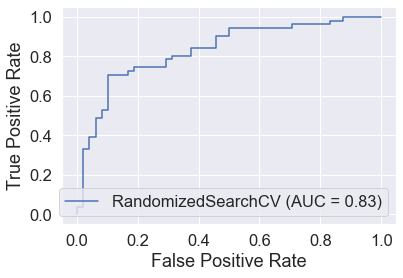

In [392]:
#Plotting and calculating ROC Curve and AUC metrics
plot_roc_curve(rs_rf, X1_test, y1_test);

In [393]:
#Confusion Matrix
print(confusion_matrix(y1_test, y1_preds))

[[43  5]
 [17 34]]


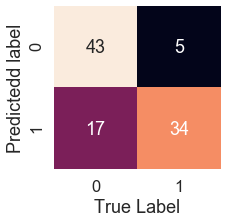

In [394]:
sns.set(font_scale = 1.5)
def plot_conf_mat(y1_test, y1_preds):
    """
    Plots a nice looking confusion matrix using seaborn's heatmap()
    """
    
    fig, ax = plt.subplots(figsize = (3,3))
    ax=sns.heatmap(confusion_matrix(y1_test, y1_preds),
                  annot = True,
                  cbar = False)
    plt.xlabel("True Label")
    plt.ylabel("Predictedd label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y1_test, y1_preds)
    

#### Now we will be getting classification report, cross-validation, precision, recall and f1-score for our model

In [395]:
print(classification_report(y1_test, y1_preds))

              precision    recall  f1-score   support

           1       0.72      0.90      0.80        48
           2       0.87      0.67      0.76        51

    accuracy                           0.78        99
   macro avg       0.79      0.78      0.78        99
weighted avg       0.80      0.78      0.78        99



In [396]:
### Calculating evaluation mmetrics using cross-validations

# Check best hyperparameters
rs_rf.best_params_

{'n_estimators': 10,
 'min_samples_split': 8,
 'min_samples_leaf': 7,
 'max_depth': 10}

In [397]:
#Creating a new classifier with best parameter
clf = RandomForestClassifier(n_estimators= 10,
                             min_samples_split=  8,
                             min_samples_leaf= 7,
                             max_depth = 10 )

In [398]:
np.random.seed(42)

#Cross validation accuracy
cv_acc = cross_val_score(clf, 
                        X1,
                        y1,
                        cv = 5,
                        scoring = "accuracy")
cv_acc

array([0.7979798 , 0.61616162, 0.72727273, 0.7979798 , 0.84693878])

In [399]:
#Taking mean of cross_validation accuracy
cv_acc = cv_acc.mean()
cv_acc

0.7572665429808287

In [401]:
#Cross-validation recall
cv_recall  = cross_val_score(clf,
                            X1,
                            y1,
                            cv=5,
                            scoring = "recall")
cv_recall = cv_recall.mean()
cv_recall

0.813469387755102

In [402]:
#Cross_validation precision
cv_precision = cross_val_score(clf,
                              X1,
                              y1,
                              scoring = "precision")

cv_precision = cv_precision.mean()
cv_precision

0.7334932086041963

In [403]:
#Cross_validation f1 score
cv_f1 = cross_val_score(clf,
                       X1,
                       y1,
                       scoring = "f1")
cv_f1 = cv_f1.mean()
cv_f1

0.7527227438587406

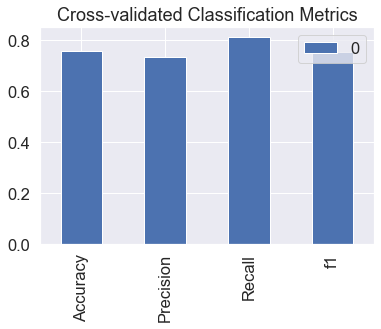

In [404]:
#Visualize cross_validation metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                          "Precision": cv_precision,
                          "Recall": cv_recall,
                          "f1" : cv_f1},
                         index = [0])
cv_metrics.T.plot.bar(title = "Cross-validated Classification Metrics");

# Feature importance

* Finding which feature is contributing most to the outcomes of the models and how they contribute.

* Lets find the important features for Random Forest Classifier

In [418]:
#Fit an instance of Random Forest
rs_rf.best_params_

clf = RandomForestClassifier(n_estimators =  10,
                             random_state = 42)

clf.fit(X1_train,y1_train);

In [420]:
fet_ind = np.argsort(clf.feature_importances_)[::-1]
fet_imp = clf.feature_importances_[fet_ind]

In [438]:
clf.feature_importances_

array([0.03797135, 0.02694113, 0.0306242 , 0.03656693, 0.00999329,
       0.00720851, 0.00494367, 0.02688406, 0.00867774, 0.0557365 ,
       0.00635071, 0.0182918 , 0.01873865, 0.03318547, 0.00804563,
       0.02283281, 0.03141033, 0.0475367 , 0.00381933, 0.01155413,
       0.1510061 , 0.02189288, 0.01787736, 0.01055641, 0.02829776,
       0.02141358, 0.00632601, 0.0072158 , 0.00981443, 0.00838753,
       0.00678178, 0.03671655, 0.04209968, 0.05674574, 0.05075684,
       0.01775953, 0.02968025, 0.02935882])

In [445]:
data_tmp.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                 int16
policy_state                      int8
policy_csl                        int8
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                       int8
insured_education_level           int8
insured_occupation                int8
insured_hobbies                   int8
insured_relationship              int8
capital-gains                    int64
capital-loss                     int64
incident_date                     int8
incident_type                     int8
collision_type                    int8
incident_severity                 int8
authorities_contacted             int8
incident_state                    int8
incident_city                     int8
incident_location                int16
incident_hour_of_the_day 

In [439]:
#Match coef's of features to columns
feature_dict = dict(zip(data_tmp.columns, list(clf.feature_importances_[0])))
feature_dict

TypeError: 'numpy.float64' object is not iterable

KeyError: 'Fraud_reported'

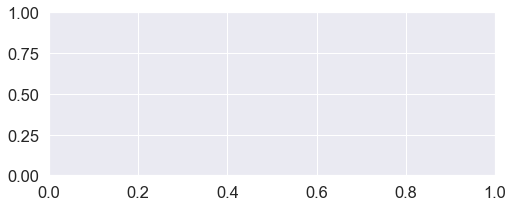

In [424]:
# Match coef's of features to columns
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
labels = data_tmp['feature_names'][fet_ind]
pd.Series(fet_imp, index=labels).plot('bar', ax=ax)
ax.set_title('Features importance')

In [ ]:
#Visulizing feature importance
feature_data = pd.DataFrame(feature_dict, index = [0])
feature_data.T.plot.bar(title = "feature Importance", legend = False);